#**GRUPO DE TRABAJO**
*  Sebastian Morales Duque
*  Juan Angel Ardila Pava

Importar librerías

In [ ]:
import pandas as pd
from google.colab import files
from sklearn.feature_selection import SelectKBest
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import metrics
import seaborn as sns
from google.colab  import drive
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import Birch
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import seaborn
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [ ]:
# Subir el archivo CSV
datos = files.upload()
archivo = list(datos.keys())[0]
# Cargar el archivo CSV en un DataFrame de Panda
df = pd.read_csv(archivo)

Saving adult_encoding.csv to adult_encoding.csv


Seleccionar top 5 características

A continuación se obtienen las 5 características más influyentes por medio del método de SelectKBest:
características más importantes:
1.  edad
2.  nivel_educativo
3.  experiencia
4.  ganancias
5.  horas_semanales

In [ ]:
X = df.drop('salario', axis=1)
y = df['salario']

#este es un metodo de seleccion de caracteristicas
#le da puntaje a cada caracteristica y borra todas las demas
#excepto las que tienen puntaje mas alto

#https://aprendeia.com/metodos-de-seleccion-de-caracteristicas-machine-learning/
# tambien se puede elegir SelectKBest(score_func=chi2, k=5)
# https://jdvelasq.github.io/courses/notebooks/sklearn_supervised_01_feature_selection/1-06_SelectKBest.html
# se basa en un test de estadistica univariada,por ejemplo chi2,  Pearson-correlation
best=SelectKBest(k=5)

features = array(X.columns)
features

array(['edad', 'tipo_empleo', 'codigo', 'nivel_educativo', 'experiencia',
       'estado_civil', 'ocupacion', 'raza', 'genero', 'ganancias',
       'perdidas', 'horas_semanales', 'pais'], dtype=object)

In [ ]:
X_new = best.fit_transform(X, y)

filter = best.get_support()
print (filter)
print(features[filter])

[ True False False  True  True False False False False  True False  True
 False]
['edad' 'nivel_educativo' 'experiencia' 'ganancias' 'horas_semanales']


Tecnica del codo

In [ ]:
#Se seleccionan las dimensiones, 3 para poder graficar
y = np.array(df['salario'])
X = np.array(df[['edad', 'nivel_educativo', 'experiencia', 'ganancias', 'horas_semanales']])

Nc = range(1, 20)
#se va a aplicar la tecnica del codo
kmeans = [KMeans(n_clusters=i) for i in Nc]
print("Kmeans")
print(kmeans)
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
print (" El puntaje")
print (score)

Kmeans
[KMeans(n_clusters=1), KMeans(n_clusters=2), KMeans(n_clusters=3), KMeans(n_clusters=4), KMeans(n_clusters=5), KMeans(n_clusters=6), KMeans(n_clusters=7), KMeans(), KMeans(n_clusters=9), KMeans(n_clusters=10), KMeans(n_clusters=11), KMeans(n_clusters=12), KMeans(n_clusters=13), KMeans(n_clusters=14), KMeans(n_clusters=15), KMeans(n_clusters=16), KMeans(n_clusters=17), KMeans(n_clusters=18), KMeans(n_clusters=19)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

 El puntaje
[-1775915890929.1616, -212397020150.54425, -50600775963.77814, -18750008175.44384, -10139715858.171774, -3826192736.8578787, -2836294138.721899, -1900682380.571889, -1331083209.9624448, -820401989.5495949, -643775856.3669677, -570552812.6212038, -484466551.9055718, -404346986.327972, -327214124.0491444, -247466183.22521383, -180358054.8743922, -142215607.45331705, -119354881.49809806]


En el siguiente gráfico se quiere mostrar por medio de la técnica del codo un acercamiento al k que posiblemente se va a elegir para obtener los centroides de los clusters. Dónde se puede observar cómo el codo resultante es igual o muy cercano al valor de 2 en el eje x.

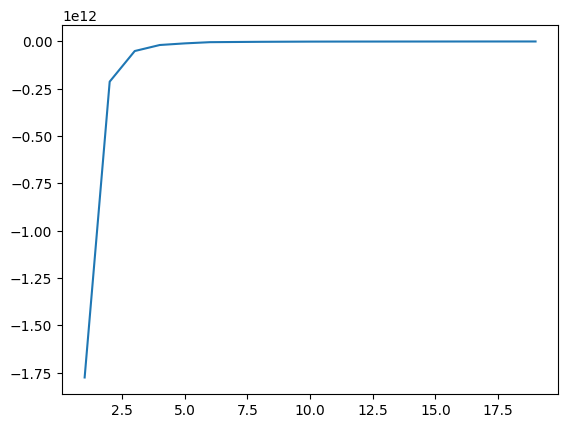

In [ ]:
plt.plot(Nc,score)

Ajuste de hiperparámetros

En el siguiente código se realiza el cálculo para obtener el mejor parámetro, número de clusters, a utilizar para luego proceder a obtener los centroides con Kmeans utilizando dicho parámetro; en este caso el mejor N° de clusters a utilizar es de 2.

In [ ]:
#** se usa para aceptar varios parámetros en funciones
def hallarMejorParametro (parameter_grid, model):
  mejor_puntaje = -1
  mejor_parametro = 0
  for g in parameter_grid:
    model.set_params(**g)
    model.fit(df2)
    # check how many unique labels do you have
    res = np.unique(model.labels_)
    #print ("shape")
    #print (res.shape)
    if res.shape[0]>1:
      coeficiente_silueta = metrics.silhouette_score(df2, model.labels_)
      print('parametro: ', g, 'puntaje: ', coeficiente_silueta)
      if coeficiente_silueta >= mejor_puntaje:
          mejor_puntaje = coeficiente_silueta
          mejor_parametro = g


  return mejor_parametro

In [ ]:
dataframe = df
columnas_deseadas = ['edad', 'nivel_educativo', 'experiencia', 'ganancias', 'horas_semanales']
df2 = dataframe[columnas_deseadas]

Nc = range(2, 10)
parametros = {'n_clusters': Nc}

parameter_grid = ParameterGrid(parametros)

list(parameter_grid)
model = KMeans()
mejor_p= hallarMejorParametro (parameter_grid, model)
print (mejor_p)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 2} puntaje:  0.9877943161158996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 3} puntaje:  0.951709488933217


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 4} puntaje:  0.9574307420537522


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 5} puntaje:  0.9596618375148007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 6} puntaje:  0.9690933729522463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 7} puntaje:  0.9699549667838677


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 8} puntaje:  0.9687117515821262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


parametro:  {'n_clusters': 9} puntaje:  0.9704016391064616
{'n_clusters': 2}


Aplicar Kmeans

Se aplica Kmeans con N° de clusters = 2 y a continuación se obtienen los punos que representan los centroides.

In [ ]:
# Se prueba con 2  clusters
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print('Centroides')
print(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides
[[3.82080048e+01 1.67822974e+00 1.00667551e+01 5.92231436e+02
  4.03915190e+01]
 [4.59591175e+01 6.10062893e-01 1.29182390e+01 9.99990000e+04
  4.97987421e+01]]


Gráfico centroides

Del gráfico de líneas mostrado a continuación, que representa los dos centroides obtenidos para las 5 variables seleccionadas con kbest, y observando los valores exactos impresos debajo del gráfico se puede concluir lo siguiente:

Cluster 1 (Centroide 0, color azul):
Este clúster está caracterizado por individuos más jóvenes con una edad promedio de 38.21 años. A pesar de tener una menor experiencia y un nivel educativo moderado, muestran un equilibrio en las ganancias y las horas semanales de trabajo, con ingresos promedio de $592.23 y un promedio de 40.39 horas semanales de trabajo.

Cluster 2 (Centroide 1, color naranja):
En contraste, el segundo clúster se compone de individuos mayores con una edad promedio de 45.96 años. Estos individuos presentan una mayor experiencia, pero con un nivel educativo más bajo en comparación con el primer clúster. Sorprendentemente, este grupo muestra ganancias significativamente más altas, con un ingreso promedio de $99,999.00, y dedican más tiempo a trabajar con un promedio de 49.80 horas semanales.

En resumen, el primer clúster representa a individuos más jóvenes con equilibrio en sus ingresos y horas de trabajo, mientras que el segundo clúster refleja a individuos mayores con mayores ingresos, probablemente debido a una mayor experiencia y dedicación laboral. Estas diferencias proporcionan percepciones valiosas para comprender la diversidad en la población estudiada.

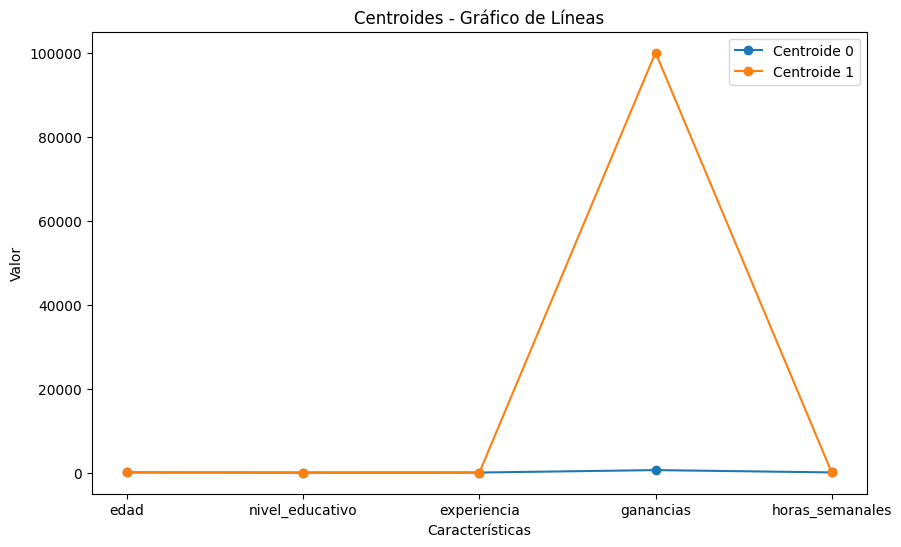

In [ ]:
#convierte centroides en un dataframe
centroides_df = pd.DataFrame(centroids, columns=['edad', 'nivel_educativo', 'experiencia', 'ganancias', 'horas_semanales'])

#crear gráfico de líneas
plt.figure(figsize=(10, 6))

for i in range(len(centroides_df)):
    plt.plot(centroides_df.columns, centroides_df.iloc[i], marker='o', label=f'Centroide {i}')

plt.title('Centroides - Gráfico de Líneas')
plt.xlabel('Características')
plt.ylabel('Valor')
plt.legend()
plt.show()


In [ ]:
print(centroides_df)


        edad  nivel_educativo  experiencia     ganancias  horas_semanales
0  38.208005         1.678230    10.066755    592.231436        40.391519
1  45.959117         0.610063    12.918239  99999.000000        49.798742
